In [1]:
def sum_of_squares(n):
    """Return the sum (1 + 2^2 + 3^2 + ... + n^2)
    
    Precondition: n > 0, type(n) == int
    
    >>> sum_of_squares(3)
    14
    >>> sum_of_squares(1)
    1
    """
    
    out = 0
    for i in range(1, n+1):
        out += i**2
    return out

In [2]:
sum_of_squares(3)

14

In [3]:
sum_of_squares(1)

1

In [4]:
def word_lengths(sentence):
    """Return a list containing the length of each word in
    sentence.
    
    >>> word_lengths("welcome to APS360!")
    [7, 2, 7]
    >>> word_lengths("machine learning is so cool")
    [7, 8, 2, 2, 4]
    """
    
    out = []
    s = str.split(sentence)
    for w in s:
        out.append(len(w))
    return out

In [5]:
word_lengths("welcome to APS360!")

[7, 2, 7]

In [6]:
word_lengths("machine learning is so cool")

[7, 8, 2, 2, 4]

In [7]:
import numpy as np

In [8]:
matrix = None
matrix = np.loadtxt('matrix.csv',delimiter=',')

In [9]:
matrix

array([[1., 2., 3.],
       [4., 5., 6.],
       [7., 8., 9.]])

In [10]:
vector = None
vector = np.load('vector.npy')

In [11]:
vector

array([[10],
       [20],
       [15]], dtype=int64)

In [12]:
# plz ignore
t = vector.shape
print(t[0])
print(t[1])

3
1


In [13]:
def mat_x_vec(m,n):
    output = None

    output = []
    s = m.shape
    for i in range(0, s[0]):
        e = 0
        for j in range(0, s[1]):
            #print("x" + str(i))
            #print("y" + str(j))
            e += m[i,j]*n[j,0]
        output.append([e])
    return output

In [14]:
output = mat_x_vec(matrix, vector)
output

[[95.0], [230.0], [365.0]]

In [15]:
np.savetxt('out_forloop.csv',output)

In [16]:
output2 = None
output2 = np.dot(matrix, vector)
output2

array([[ 95.],
       [230.],
       [365.]])

In [17]:
np.save('output_dot.npy',output2)

In [18]:
output == output2

array([[ True],
       [ True],
       [ True]])

In [19]:
class ElementwiseMultiply:
    def __init__(self, weight):
        if len(weight.shape) == 1:
            self.weight = weight
    def __call__(self, input):
        if (self.weight.shape) == (input.shape):
            return np.multiply(self.weight, input)
        else:
            return None

In [20]:
class LeakyRelu:
    def __init__(self, alpha):
        self.alpha = alpha
    def __call__(self, input):
        if type(input) == np.ndarray:
            output = input
            output[output >= 0] = output[output >= 0]
            output[output < 0] = self.alpha * output[output < 0]
        return output

In [21]:
class Compose:
    def __init__(self, layers):
        self.layers = layers
    def __call__(self, input):
        out = []
        cur_in = input
        for i in self.layers:
            cur_out = i(cur_in)
            #print(cur_out)
            out.append(list(cur_out))
            cur_in = cur_out
        return out

In [22]:
#copied from instructions
class AddBias(object):
    def __init__(self, val):
        self.val = val
    def __call__(self, input):
        return self.val + input

In [23]:
weight_1 = np.array([1, 2, 3, 4])
weight_2 = np.array([-1, -2, -3, -4])
bias_1 = 3
bias_2 = -2
alpha = 0.1

elem_mult_1 = ElementwiseMultiply(weight_1)
add_bias_1 = AddBias(bias_1)
leaky_relu = LeakyRelu(alpha)
elem_mult_2 = ElementwiseMultiply(weight_2)
add_bias_2 = AddBias(bias_2)
layers = Compose([elem_mult_1, 
                  add_bias_1, 
                  leaky_relu,
                  elem_mult_2, 
                  add_bias_2, 
                  leaky_relu])

input = np.array([10, 5, -5, -10])
print("Input: ", input)

output = layers(input)
print("Output:", output)

Input:  [ 10   5  -5 -10]
Output: [[10, 10, -15, -40], [13, 13, -12, -37], [13, 13, -1, -3], [-13, -26, 3, 12], [-15, -28, 1, 10], [-1, -2, 1, 10]]


In [24]:
#plz ignore
t = np.array([1,2,3])
t[t<2] = 2
t

array([2, 2, 3])

In [25]:
import matplotlib.pyplot as plt

In [26]:
img = None
img = plt.imread('dog_mochi.png')

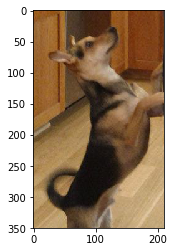

In [27]:
plt.imshow(img)

In [28]:
img[50, 90]

array([0.36862746, 0.28235295, 0.1882353 , 1.        ], dtype=float32)

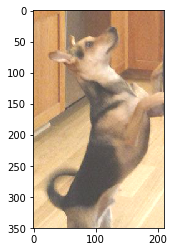

In [29]:
img_add = None
plt.imshow(np.clip(img+0.25,0,1))

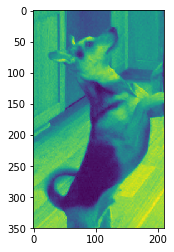

In [30]:
img_r = np.array(img[:,:,0])
plt.imshow(img_r)

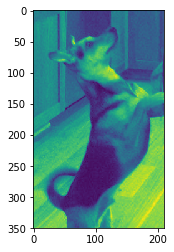

In [31]:
img_g = np.array(img[:,:,1])
plt.imshow(img_g)

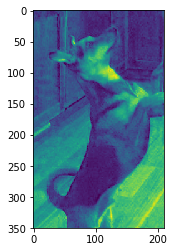

In [32]:
img_b = np.array(img[:,:,2])
plt.imshow(img_b)

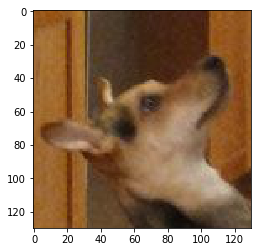

In [33]:
img_face = img[0:130,20:150]
plt.imshow(img_face)

In [34]:
plt.imsave('dog_name',img_face)